In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import csv
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, TruncatedSVD, NMF
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.datasets import samples_generator as sg
from sklearn.metrics import consensus_score


%matplotlib inline

In [72]:
input_path = '../joke_recommender/data/'
df = pd.read_csv(input_path + 'scaled_df.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df 

,0,1,2,3,4,5,6,7,8,9,...,73412,73413,73414,73415,73416,73417,73418,73419,73420,73421
0,1.779864,1.065648,1.332255,1.898623,1.057602,1.992216,1.350401,1.688979,1.246819,1.114807,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.769431,1.513865,1.364078,1.291460,1.483653,2.000000,1.503393,1.562608,1.265267,1.250000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.605112,1.675722,1.403452,1.336639,1.483653,1.309808,1.374460,1.943451,1.067430,1.351931,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1.296296,1.302207,1.515642,1.507989,1.979761,1.994811,1.167798,1.537796,1.262087,1.437768,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,1.782473,1.868138,1.926645,1.850138,1.911780,1.692787,1.934608,1.476053,1.558524,1.742489,...,1.707087,1.765074,1.19598,1.0,1.079971,1.784543,2.0,1.142857,1.595135,1.877922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.842984,1.505376,1.735707,1.721763,1.987545,1.614427,1.626157,1.579342,1.919847,1.586373,...,1.631783,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
96,1.255608,1.508206,1.172600,1.363636,1.989621,1.617021,1.550895,1.817657,1.849237,1.568133,...,0.000000,0.000000,0.00000,0.0,0.000000,1.949649,0.0,0.000000,0.000000,0.000000
97,1.503912,1.796831,1.149407,1.564187,1.989621,1.692787,1.536089,1.621466,1.830153,1.781652,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
98,1.683359,1.458970,1.395361,1.633609,1.984951,1.989621,1.703886,1.686093,1.895038,1.947961,...,1.911406,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [73]:
df.index = np.arange(1, len(df) + 1)
X = df.T.reset_index(drop=True)
X

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,1.779864,1.769431,1.605112,1.296296,1.782473,1.605112,1.762128,1.685968,1.379760,1.440271,...,1.792384,1.273344,1.701095,1.888367,1.561815,1.842984,1.255608,1.503912,1.683359,1.741784
1,1.065648,1.513865,1.675722,1.302207,1.868138,1.518959,1.653650,1.623656,1.071307,1.299377,...,1.766271,1.631579,1.724958,1.560272,1.464063,1.505376,1.508206,1.796831,1.458970,1.730617
2,1.332255,1.364078,1.403452,1.515642,1.926645,1.588997,1.230313,1.601942,1.067961,1.756742,...,1.620280,1.303668,1.444984,1.610032,1.316613,1.735707,1.172600,1.149407,1.395361,1.122977
3,1.898623,1.291460,1.336639,1.507989,1.850138,1.871625,1.090909,1.906336,1.221488,1.111846,...,1.258953,1.855647,1.764738,1.219284,1.850138,1.721763,1.363636,1.564187,1.633609,1.486501
4,1.057602,1.483653,1.483653,1.979761,1.911780,1.941879,1.725480,1.644525,1.012455,1.642449,...,1.498703,2.000000,1.944473,1.987545,1.334717,1.987545,1.989621,1.989621,1.984951,1.979761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73417,0.000000,0.000000,0.000000,0.000000,1.784543,0.000000,1.432084,1.011710,0.000000,0.000000,...,1.909836,0.000000,0.000000,0.000000,0.000000,0.000000,1.949649,0.000000,0.000000,0.000000
73418,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.936376,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73419,0.000000,0.000000,0.000000,0.000000,1.142857,0.000000,0.000000,1.062455,0.000000,0.000000,...,1.550610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73420,0.000000,0.000000,0.000000,0.000000,1.595135,0.000000,1.274544,1.413553,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [80]:
Xsub = X.iloc[15000:17000,:]
Xsub

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
15000,1.092857,1.017857,1.034524,1.023810,1.058333,1.075000,1.011905,1.040476,1.029762,1.058333,...,1.052381,1.855952,1.075000,1.058333,1.058333,1.110714,1.000000,1.098810,1.092857,1.098810
15001,1.929661,1.789831,1.053390,1.798305,1.938136,1.605085,1.925424,1.814407,1.226271,1.838983,...,1.740678,1.884746,1.872034,1.863559,1.781356,1.616949,1.576271,1.938136,1.966949,2.000000
15002,1.413585,1.538868,1.776604,1.421132,1.340377,1.809811,1.494340,1.593208,1.941132,1.930566,...,1.487547,1.541887,1.549434,1.461887,1.472453,1.432453,1.443019,1.417358,1.413585,1.377358
15003,1.950713,1.737530,1.685867,1.149644,1.726247,1.317102,1.221496,1.855701,1.763658,1.682898,...,1.406176,1.236342,1.057601,1.184086,1.639549,1.850356,1.821259,1.415083,1.729216,1.757720
15004,1.887060,1.597616,1.964245,1.110102,1.005675,1.887060,1.870602,1.870602,1.845630,1.878547,...,1.000000,1.889898,1.834847,1.145857,1.812713,1.812713,1.892736,1.845630,1.126561,1.900681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,2.000000,1.694608,1.567539,1.728243,1.331554,1.513081,1.318740,1.362520,1.689269,1.445809,...,0.000000,0.000000,0.000000,1.391351,0.000000,1.432461,1.386012,1.523225,1.429792,1.549386
16996,1.061594,1.692029,1.173309,1.469203,1.595411,1.829710,1.536836,1.249396,1.135266,1.073671,...,1.812198,1.513285,1.636473,1.105676,1.272947,1.328502,1.762681,1.636473,1.692029,1.554348
16997,1.264141,1.924235,1.546445,1.188895,1.964712,1.130773,1.964712,1.118319,1.251687,1.505968,...,0.000000,1.004670,0.000000,1.941879,1.768033,1.781007,1.007265,1.072652,1.009860,1.987545
16998,1.398117,1.244740,1.016058,1.344408,1.949059,1.817276,1.663898,1.532669,1.387043,1.029900,...,0.000000,0.000000,1.962348,1.201550,1.201550,1.196567,1.975637,1.016058,1.661683,1.873754


In [81]:
# set up variables
XMask = (Xsub!=0).astype('int') # 0: missing, 1: observed
XOnes = pd.DataFrame(np.ones(Xsub.shape))

nonzero_loc = np.where(Xsub!=0)

I = len(Xsub.index)         # number of users
J = 100                  # number of jokes

# number of latent factors
k = 5

U = np.random.uniform(0, 2, size=k*I).reshape((I, k))
V = np.random.uniform(0, 2, size=k*J).reshape((J, k))

In [64]:
# X_fill = Xsub.fillna(99) # doesn't matter what number we fill NaN values with

In [84]:
residual2 = []

rate = 0.1

for t in tqdm_notebook(range(0, 300)):
    # compute error after one sweep of updates
    E = (Xsub - np.inner(U, V))*XMask
    residual2 += [np.linalg.norm(E, 'fro')]
    for i, j in zip(*nonzero_loc):
        U[i] = U[i] + rate*V[j]*(X.iloc[i,j] - np.inner(U[i], V[j]))
        V[j] = V[j] + rate*U[i]*(X.iloc[i,j] - np.inner(U[i], V[j]))

In [90]:
XsubFit

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.455723,2.047833,2.043111,1.889963,1.961825,1.923963,1.876195,1.907251,1.913064,1.960822,...,1.952873,1.511045,1.823748,1.651019,1.597953,1.866463,1.826672,1.869414,1.656059,1.741784
1,1.790048,1.693070,1.684589,1.566323,1.857127,1.851673,1.850953,1.850206,1.854013,1.864770,...,1.917024,1.592422,1.827361,1.737710,1.726147,1.915982,1.909212,1.855062,1.557237,1.730617
2,1.567915,1.341415,1.338789,1.214387,1.260975,1.221509,1.184137,1.208203,1.213530,1.251434,...,1.287062,0.943310,1.246178,1.053217,0.976896,1.267720,1.193832,1.283657,1.090903,1.122977
3,2.363769,2.076335,2.071099,1.860981,1.919490,1.876730,1.827170,1.860832,1.869295,1.932063,...,2.034801,1.888198,1.784465,1.897458,1.875292,1.721593,1.682699,1.625399,1.634127,1.486501
4,2.289349,2.146754,2.137337,1.952153,2.240731,2.219954,2.204303,2.213710,2.220310,2.251295,...,2.356587,2.030351,2.198650,2.158654,2.135389,2.251469,2.224166,2.158186,1.888248,1.979761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.528960,2.396257,2.399990,2.412645,2.043970,2.003711,1.897458,1.971280,1.972184,2.038989,...,1.627103,1.153323,1.416321,1.253739,1.254546,1.428129,1.471454,1.587807,1.749297,1.814784
1996,3.587426,2.358720,2.361342,2.384793,2.015554,1.998096,1.899619,1.967534,1.966024,2.025876,...,1.564019,1.083338,1.285352,1.183308,1.242568,1.330587,1.457266,1.478058,1.639722,1.800841
1997,3.516470,2.246122,2.252734,2.312651,1.813744,1.772905,1.654114,1.737174,1.736645,1.806610,...,1.306836,0.863044,1.092373,0.937838,0.949100,1.086397,1.145916,1.287479,1.560611,1.599574
1998,3.499437,2.208697,2.209265,2.332445,2.048364,2.078223,2.010776,2.057576,2.050267,2.073176,...,1.472043,0.958622,1.186067,1.104845,1.251640,1.330802,1.576654,1.488429,1.591065,1.990089


In [91]:
XsubFitFixed

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.455723,2.047833,2.043111,1.889963,1.961825,1.923963,1.876195,1.907251,1.913064,1.960822,...,1.952873,1.511045,1.823748,1.651019,1.597953,1.866463,1.826672,1.869414,1.656059,1.741784
1,1.790048,1.693070,1.684589,1.566323,1.857127,1.851673,1.850953,1.850206,1.854013,1.864770,...,1.917024,1.592422,1.827361,1.737710,1.726147,1.915982,1.909212,1.855062,1.557237,1.730617
2,1.567915,1.341415,1.338789,1.214387,1.260975,1.221509,1.184137,1.208203,1.213530,1.251434,...,1.287062,0.943310,1.246178,1.053217,0.976896,1.267720,1.193832,1.283657,1.090903,1.122977
3,2.363769,2.076335,2.071099,1.860981,1.919490,1.876730,1.827170,1.860832,1.869295,1.932063,...,2.034801,1.888198,1.784465,1.897458,1.875292,1.721593,1.682699,1.625399,1.634127,1.486501
4,2.289349,2.146754,2.137337,1.952153,2.240731,2.219954,2.204303,2.213710,2.220310,2.251295,...,2.356587,2.030351,2.198650,2.158654,2.135389,2.251469,2.224166,2.158186,1.888248,1.979761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.528960,2.396257,2.399990,2.412645,2.043970,2.003711,1.897458,1.971280,1.972184,2.038989,...,1.627103,1.153323,1.416321,1.253739,1.254546,1.428129,1.471454,1.587807,1.749297,1.814784
1996,3.587426,2.358720,2.361342,2.384793,2.015554,1.998096,1.899619,1.967534,1.966024,2.025876,...,1.564019,1.083338,1.285352,1.183308,1.242568,1.330587,1.457266,1.478058,1.639722,1.800841
1997,3.516470,2.246122,2.252734,2.312651,1.813744,1.772905,1.654114,1.737174,1.736645,1.806610,...,1.306836,0.863044,1.092373,0.937838,0.949100,1.086397,1.145916,1.287479,1.560611,1.599574
1998,3.499437,2.208697,2.209265,2.332445,2.048364,2.078223,2.010776,2.057576,2.050267,2.073176,...,1.472043,0.958622,1.186067,1.104845,1.251640,1.330802,1.576654,1.488429,1.591065,1.990089


Text(0.5, 1, 'Ratings')

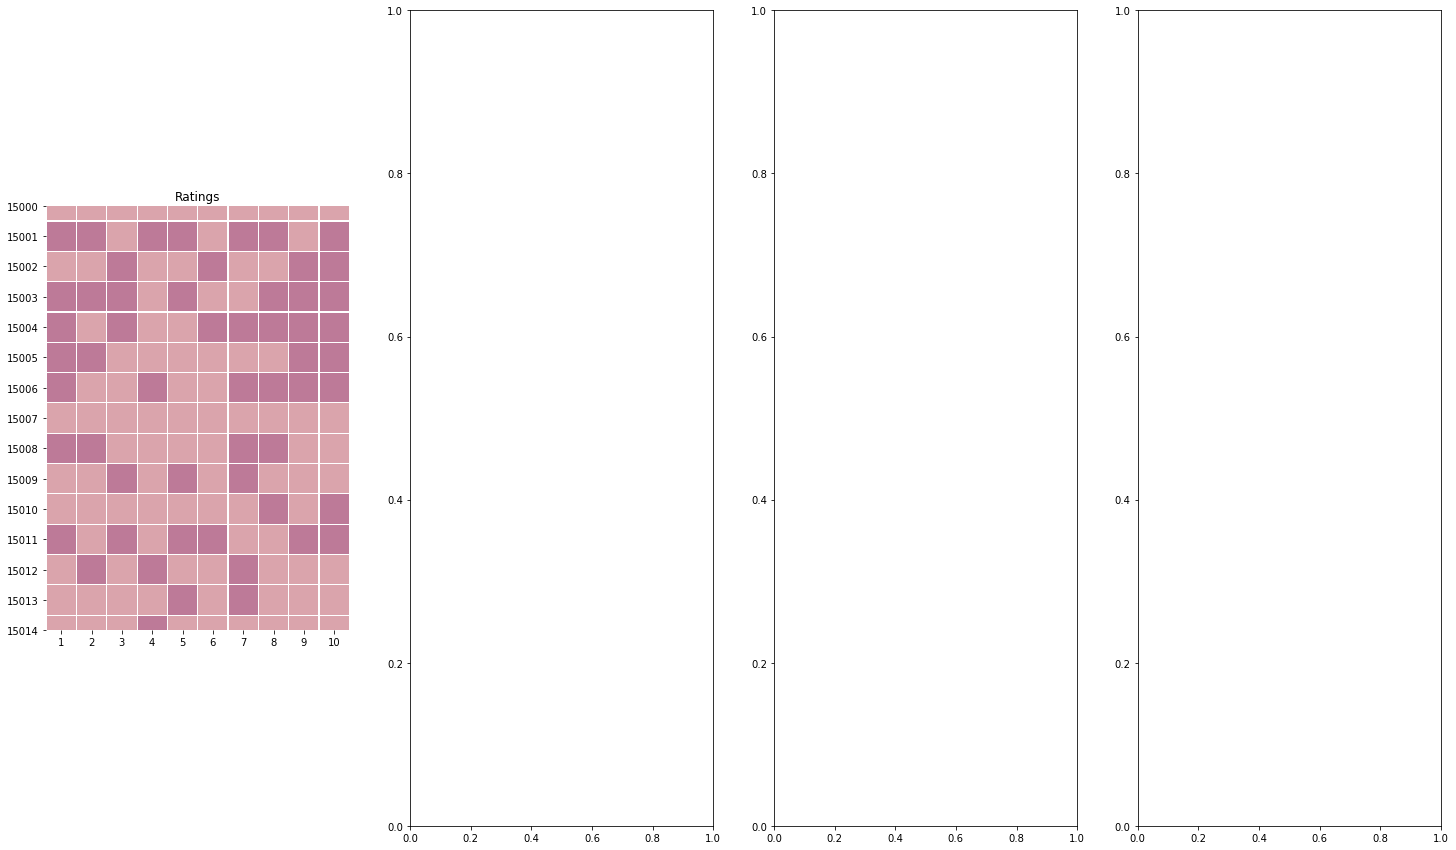

In [94]:
XsubFit = pd.DataFrame(np.inner(U, V)*XOnes)

XsubFitFixed = np.minimum(XsubFit, 5)
XsubFitFixed = np.maximum(XsubFitFixed, 0)

fig, ax = plt.subplots(ncols=4, figsize=(25, 15))
sns.heatmap(Xsub.iloc[0:15,0:10],
            ax=ax[0], vmin=0, vmax=5, square=True, linewidths=0.1,
            cbar=False, cmap=sns.cubehelix_palette(6));
ax[0].set_title('Ratings')

# sns.heatmap(XsubFitFixed*XMask, 
#             ax=ax[1], vmin=0, vmax=5, square=True, linewidths=0.1,
#             cbar=False, cmap=sns.cubehelix_palette(6));
# ax[1].set_title('Fit - Ratings')

# sns.heatmap(XsubFitFixed, 
#             ax=ax[2], vmin=0, vmax=5, square=True, linewidths=0.1,
#             cbar=False, cmap=sns.cubehelix_palette(6));
# ax[2].set_title('All - Ratings')

# sns.heatmap((XsubFitFixed*XMask - Xsub), center=0,
#             ax=ax[3], vmin=-5, vmax=5, square=True, linewidths=0.1,
#             cbar=False, cmap='jet');
# ax[3].set_title('Fit - Residuals');

In [86]:
V

array([[ 5.75693251e-01,  5.79065151e-01,  6.84845126e-01,
         1.68125145e+00,  3.86142614e+00],
       [ 8.73829925e-01,  1.11236261e+00,  1.05175372e+00,
         1.68406968e+00,  2.01414848e+00],
       [ 8.79221909e-01,  1.11557720e+00,  1.02013969e+00,
         1.69713971e+00,  2.01531341e+00],
       [ 1.19890311e+00,  1.33360725e+00,  5.23606364e-01,
         1.31413839e+00,  2.18700702e+00],
       [ 1.44259123e+00,  1.51104906e+00,  1.46000792e+00,
         7.80569524e-01,  1.70139630e+00],
       [ 1.36331986e+00,  1.44970014e+00,  1.60251447e+00,
         5.29585170e-01,  1.78639732e+00],
       [ 1.36092314e+00,  1.45113035e+00,  1.72939434e+00,
         3.44567268e-01,  1.71247702e+00],
       [ 1.36897880e+00,  1.46290528e+00,  1.63060313e+00,
         4.74637742e-01,  1.76115236e+00],
       [ 1.37153174e+00,  1.47016860e+00,  1.62990513e+00,
         5.03309391e-01,  1.74573592e+00],
       [ 1.31616533e+00,  1.44782884e+00,  1.60493231e+00,
         6.93383160e-01

In [68]:
E

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
16500,-13.556614,-0.681814,-8.574228,-0.491491,-5.964399,-9.701503,-0.981116,-1.379555,-8.806439,-7.760681,...,0.000000,-8.617247,-4.889767,-4.803395,1.381538,-3.420314,-8.667269,0.207794,2.570047,-2.246219
16501,2.656025,0.017334,-7.221517,3.589349,-11.680271,-8.071374,2.091042,-6.165350,4.806321,0.889993,...,0.700276,-4.528520,1.840402,-12.966065,-9.920711,0.792874,-2.387148,-10.106007,-14.458535,-4.799970
16502,-12.084504,-14.981642,3.374075,5.100939,-3.734613,-7.593047,-11.809851,-10.565916,-5.232437,-8.433294,...,-4.799226,4.025361,1.980906,0.382797,-2.520254,1.191467,3.179359,2.649259,3.972314,2.405403
16503,-10.966425,-14.377941,3.932925,-3.065396,-9.579727,2.881452,-5.375706,-7.711275,0.501876,-0.566323,...,-8.762607,1.588053,1.400443,-8.612305,3.319513,-0.954240,4.558889,-0.592616,2.188276,1.575166
16504,-5.151648,-8.276201,-3.295255,-3.292974,-8.500561,-2.621817,-2.613194,-2.343416,-4.383835,-5.514465,...,-2.450734,2.155410,1.682760,-1.877669,4.535700,4.789204,5.335155,-1.913192,1.958868,-8.919324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,-6.495835,-10.907805,-7.127886,-6.218059,-3.676554,-7.255001,-13.521579,-8.377679,-9.198288,-6.684649,...,0.000000,0.000000,0.000000,0.000000,-9.176199,-9.729434,-13.994394,-0.727193,-8.137258,-10.917429
17496,-5.232151,-3.459666,-3.284130,-12.272897,-2.995964,-14.304932,-1.586212,-4.828588,-4.631598,-3.924193,...,0.000000,0.000000,-10.451015,-13.024728,0.769677,-10.852876,-9.860679,-6.386763,1.609725,-5.612300
17497,-5.894900,-15.171621,-12.977569,-12.566216,-3.823751,-13.531613,-13.003647,-17.499352,-13.308725,-7.026312,...,-9.703618,0.000000,0.000000,0.000000,0.000000,-15.274024,-13.244299,-14.676213,-13.272560,-14.231015
17498,-6.190939,-0.961115,4.973295,-5.893406,-2.363320,3.737616,-2.479391,-0.219655,2.050782,1.333687,...,0.000000,-0.024864,0.000000,0.000000,0.000000,-1.672795,-1.012245,-5.234469,-7.086067,3.081355


In [69]:
residual2

[2033.7670948600512]